# Data Preparation

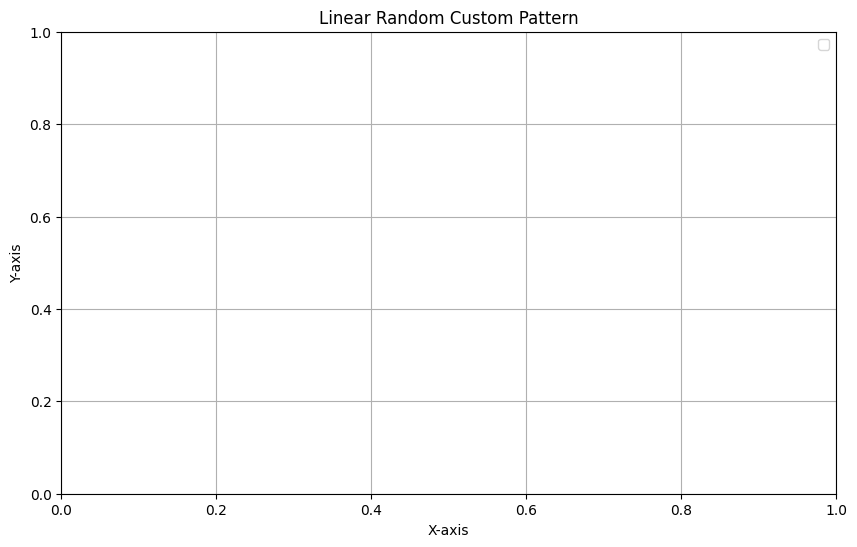

In [21]:
import matplotlib.pyplot as plt
import numpy as np

mainX = []
mainY = []

for i in range(20):
    # Generate random data
    x = np.linspace(20, 20, 20)
    y = np.random.rand(20) + x * np.random.rand(20)  # Linear pattern with noise

    mainX.extend(x)
    mainY.extend(y)


# Create a line plot
plt.figure(figsize=(10, 6))
#plt.plot(mainX, y, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Random Linear Pattern')

# Customize plot elements
plt.title('Linear Random Custom Pattern')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


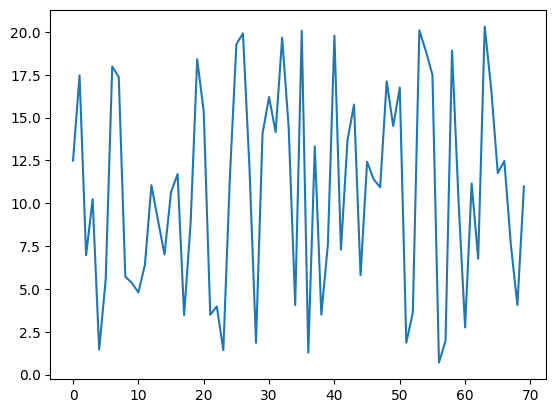

In [22]:
plt.plot(mainY[:70])

In [23]:
len(mainY)

400

---

# Week Model



## Data Seperation

In [24]:
XData = mainY[:393]
YData = mainY[7:]

In [25]:
len(XData), len(YData)

(393, 393)

In [26]:
def split(list_a, chunk_size):
    for i in range(0, len(list_a)-1, chunk_size):
        yield np.array(list_a[i:i + chunk_size]).astype(np.float32)

chunk_size = 7
XData = (list(split(XData, chunk_size)))
YData = (list(split(YData, chunk_size)))

In [27]:
len(XData),len(YData)

(56, 56)

In [28]:
YData.pop()
XData.pop()

array([10.925624 ,  7.1160774,  8.006679 , 14.509958 , 17.62743  ,
       14.808141 ,  3.7164814], dtype=float32)

In [29]:
YData = np.asarray(YData).astype(np.float32)
XData = np.asarray(XData).astype(np.float32)

## Model Building and Training
---

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import LSTM

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from sklearn.model_selection import KFold,GroupKFold
from tensorflow.keras import layers
tf.config.run_functions_eagerly(True)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 XData, YData, test_size=0.33, random_state=42)

In [32]:
YData

array([[17.369072  ,  5.7143483 ,  5.3529277 ,  4.7941995 ,  6.4017577 ,
        11.061528  ,  9.004482  ],
       [ 7.0092907 , 10.655724  , 11.701045  ,  3.466237  ,  8.883419  ,
        18.411577  , 15.355185  ],
       [ 3.4876487 ,  3.9758906 ,  1.4263424 , 11.491192  , 19.289156  ,
        19.922956  , 12.078955  ],
       [ 1.844974  , 14.068201  , 16.206219  , 14.153957  , 19.66592   ,
        14.4304285 ,  4.054665  ],
       [20.068314  ,  1.2769518 , 13.323156  ,  3.4964457 ,  7.5979314 ,
        19.791628  ,  7.285265  ],
       [13.679836  , 15.764166  ,  5.7950115 , 12.422949  , 11.399483  ,
        10.933363  , 17.119724  ],
       [14.513232  , 16.766117  ,  1.8579895 ,  3.6210117 , 20.094847  ,
        18.87959   , 17.500038  ],
       [ 0.70248806,  1.9593439 , 18.916769  , 10.075563  ,  2.7512815 ,
        11.151811  ,  6.7602234 ],
       [20.324411  , 16.633532  , 11.7658415 , 12.470752  ,  7.5762877 ,
         4.0541005 , 10.984682  ],
       [11.99058   , 19.1171

In [33]:
def build_model():

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(7, 1)))

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)))

    model.add(tf.keras.layers.GRU(64, return_sequences=True, kernel_initializer='uniform'))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.GRU(32, return_sequences=True, kernel_initializer='uniform'))
    model.add(tf.keras.layers.Dropout(0.2))


    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(7))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mae', metrics=['mse'])

    model.summary()

    return model

In [34]:
save_best = tf.keras.callbacks.ModelCheckpoint("weekPrediction.keras", monitor='val_loss',verbose=1, save_best_only=True)

In [35]:
model = build_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40, batch_size=128, verbose=1, callbacks=[save_best])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, 7, 128)              │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 7, 64)               │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 7, 64)               │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 7, 32)               │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           7,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,807 (456.28 KB)

 Trainable params: 116,807 (456.28 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 732ms/step - loss: 10.8284 - mse: 151.2817
Epoch 1: val_loss improved from inf to 10.31685, saving model to weekPrediction.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 10.8284 - mse: 151.2817 - val_loss: 10.3169 - val_mse: 141.2670
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - loss: 10.8144 - mse: 150.9896
Epoch 2: val_loss improved from 10.31685 to 10.30260, saving model to weekPrediction.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step - loss: 10.8144 - mse: 150.9896 - val_loss: 10.3026 - val_mse: 140.9693
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - loss: 10.7999 - mse: 150.6717
Epoch 3: val_loss improved from 10.30260 to 10.28339, saving model to weekPrediction.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 10.7999 - mse: 150.6717 - val_loss: 10.2834 - val_mse: 140.5672
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 978ms/step - loss: 10.7814 - mse: 150.2756
Epoch 4: val_loss improved from 10.28339 to 10.25649, saving model to weekPre

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


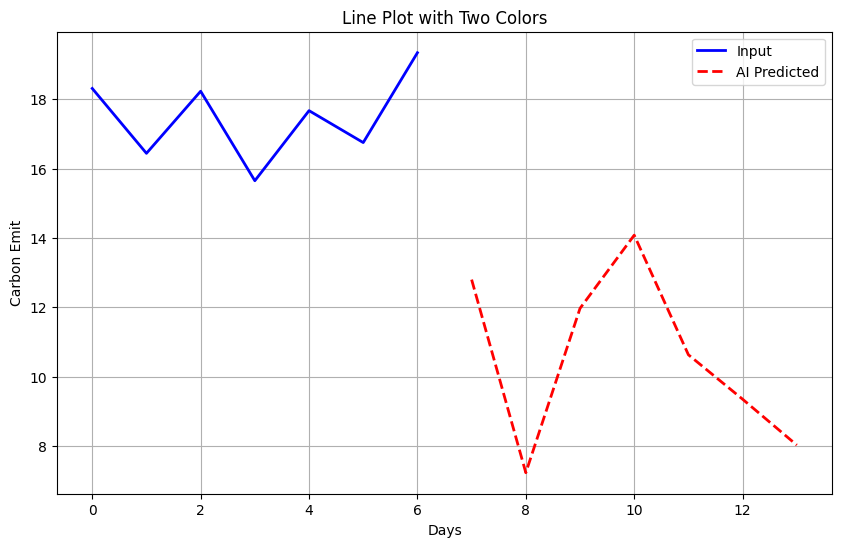

In [36]:
test = np.array([18.31,16.44,18.23,15.65,17.67,16.75,19.34]).astype(np.float32)
pred = model.predict(test.reshape(1,7))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(14):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:7], graphPrediction[:7], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[7:], graphPrediction[7:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.title('Line Plot with Two Colors')
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


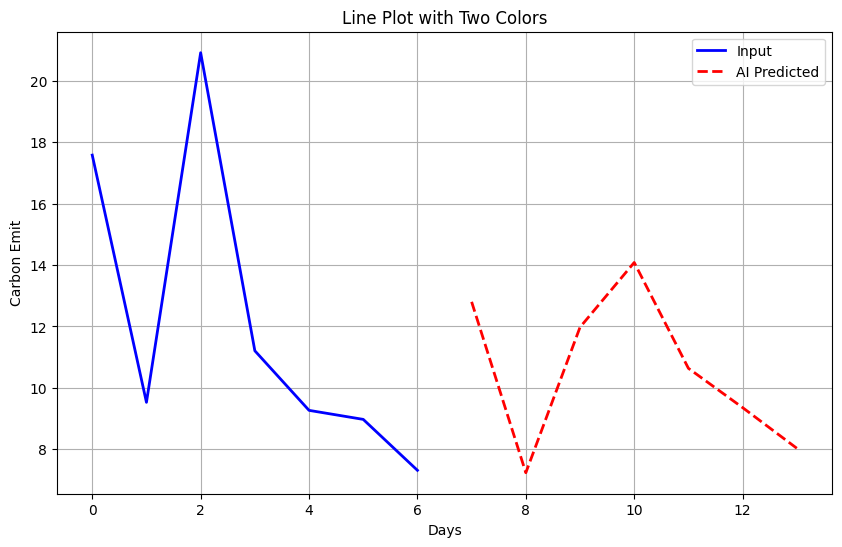

In [37]:
test = np.array([17.582363,  9.527162, 20.918768, 11.207062,  9.265643, 8.97169 ,
        7.311791]).astype(np.float32)
pred = model.predict(test.reshape(1,7))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(14):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:7], graphPrediction[:7], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[7:], graphPrediction[7:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.title('Line Plot with Two Colors')
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


---

# Month Prediction Algorithm

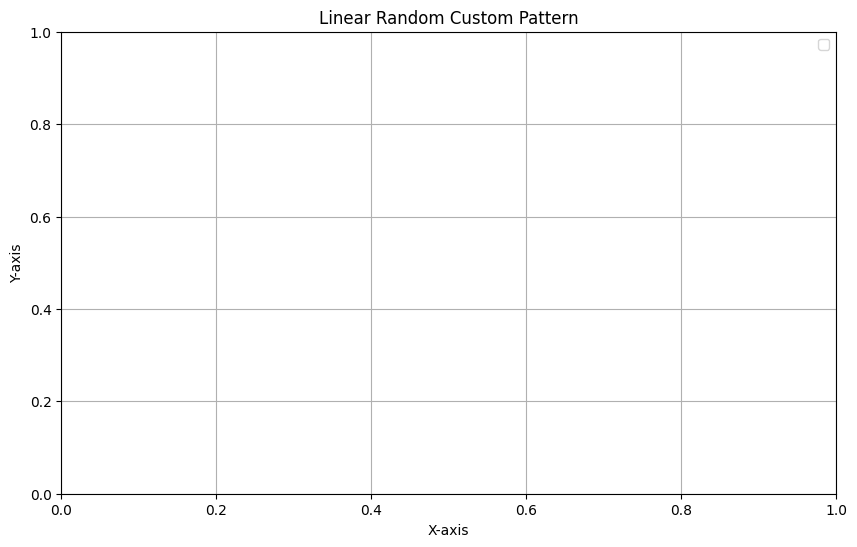

In [38]:
import matplotlib.pyplot as plt
import numpy as np

mainX = []
mainY = []

for i in range(100):
    # Generate random data
    x = np.linspace(20, 50, 50)
    y = np.random.rand(50) + x * np.random.rand(50)  # Linear pattern with noise

    mainX.extend(x)
    mainY.extend(y)


# Create a line plot
plt.figure(figsize=(10, 6))
#plt.plot(mainX, y, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Random Linear Pattern')

# Customize plot elements
plt.title('Linear Random Custom Pattern')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [39]:
len(mainY)

5000

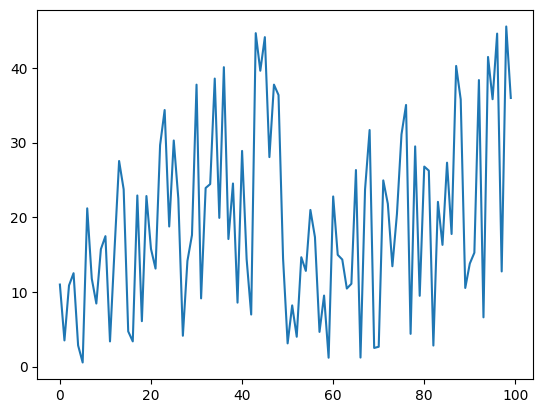

In [40]:
plt.plot(mainY[:100])

In [41]:
XData = mainY[:4970]
YData = mainY[30:]

In [42]:
len(XData), len(YData)

(4970, 4970)

In [43]:
def split(list_a, chunk_size):
    for i in range(0, len(list_a)-1, chunk_size):
        yield np.array(list_a[i:i + chunk_size]).astype(np.float32)

chunk_size = 30
XData = (list(split(XData, chunk_size)))
YData = (list(split(YData, chunk_size)))

In [44]:
YData.pop()
XData.pop()

array([12.97806  , 10.261865 , 17.887163 , 18.073769 ,  3.580943 ,
        6.1290226,  0.6826732, 10.237872 , 14.957713 , 19.657612 ,
        6.2371607, 12.840994 , 14.486375 ,  2.8241873, 23.382797 ,
       25.415058 ,  6.1567245, 29.326792 , 29.806353 , 12.703929 ],
      dtype=float32)

In [45]:
YData = np.asarray(YData).astype(np.float32)
XData = np.asarray(XData).astype(np.float32)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import LSTM

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from sklearn.model_selection import KFold,GroupKFold
from tensorflow.keras import layers

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 XData, YData, test_size=0.33, random_state=42)

In [48]:
def build_model():

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), input_shape=(30, 1)))

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='uniform'))
    model.add(tf.keras.layers.Dense(30))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mae', metrics=['mse'])

    model.summary()

    return model

In [49]:
save_best = tf.keras.callbacks.ModelCheckpoint("monthModel.keras", monitor='val_loss',verbose=1, save_best_only=True)

In [50]:
model = build_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1, callbacks=[save_best])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional)      │ (None, 30, 256)             │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 30, 128)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3840)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         245,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,246 (2.08 MB)

 Trainable params: 545,246 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 17.9746 - mse: 453.5194
Epoch 1: val_loss improved from inf to 16.20574, saving model to monthModel.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 17.9103 - mse: 450.9499 - val_loss: 16.2057 - val_mse: 382.5076
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - loss: 16.6536 - mse: 406.2662
Epoch 2: val_loss improved from 16.20574 to 14.33600, saving model to monthModel.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 16.5134 - mse: 401.2326 - val_loss: 14.3360 - val_mse: 315.3608
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 897ms/step - loss: 14.6102 - mse: 331.6901
Epoch 3: val_loss improved from 14.33600 to 13.01355, saving model to monthModel.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 14.5318 - mse: 328.8252 - val_loss: 13.0135 - val_mse: 265.5263
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - loss: 13.3087 - mse: 281.6482
Epoch 4: val_loss improved from 13.01355 to 12.59756, saving model to monthModel.keras
2/2 

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


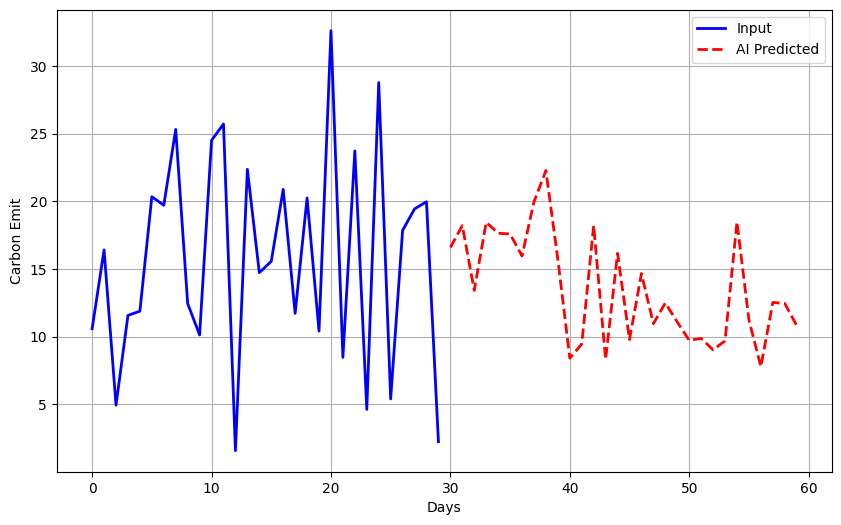

In [51]:
test = np.array([10.580897 , 16.407118 ,  4.9232693, 11.562812 , 11.876699 ,
       20.3376   , 19.706802 , 25.314161 , 12.438278 , 10.116097 ,
       24.502548 , 25.714218 ,  1.5572892, 22.36543  , 14.721957 ,
       15.5617   , 20.881203 , 11.710397 , 20.246723 , 10.40407  ,
       32.610992 ,  8.457507 , 23.724775 ,  4.6104083, 28.781645 ,
        5.388179 , 17.848938 , 19.437452 , 19.965925 ,  2.2242668]).astype(np.float32)

pred = model.predict(test.reshape(1,30))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(60):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:30], graphPrediction[:30], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[30:], graphPrediction[30:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


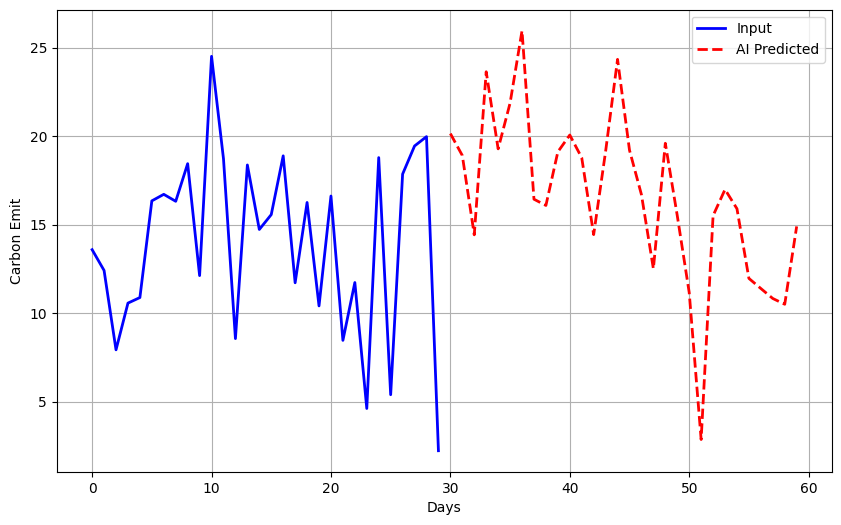

In [52]:
test = np.array([13.580897 , 12.407118 ,  7.9232693, 10.562812 , 10.876699 ,
       16.3376   , 16.706802 , 16.314161 , 18.438278 , 12.116097 ,
       24.502548 , 18.714218 ,  8.5572892, 18.36543  , 14.721957 ,
       15.5617   , 18.881203 , 11.710397 , 16.246723 , 10.40407  ,
       16.610992 ,  8.457507 , 11.724775 ,  4.6104083, 18.781645 ,
        5.388179 , 17.848938 , 19.437452 , 19.965925 ,  2.2242668]).astype(np.float32)

pred = model.predict(test.reshape(1,30))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(60):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:30], graphPrediction[:30], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[30:], graphPrediction[30:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [53]:
model.save('model.keras')

---